# Regresion logistica: tipo de trafico en la darknet

Se construye un sistema capas de predecir el tipo de trafico dentro de la darknet utilizando las caracteristicas de flujo de datos, como los puertos de origen y destino, el protocolo, la duración del flujo, el número de paquetes, etc.

## Importacion de bibliotecas

In [1]:
# Importar bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.metrics import confusion_matrix

##  Carga y vista inicial de los datos

In [2]:
import os
import pandas as pd

# Cargar el dataset
df = pd.read_csv(os.path.join('Darknet.CSV'))





## Preprocesamiento de los datos

In [3]:
# Selección de columnas (usamos todas las numéricas y 'Label' como objetivo)
X = df.drop(columns=['Label', 'Label.1', 'Flow ID', 'Src IP', 'Dst IP', 'Timestamp'])  # Eliminamos columnas no numéricas
y = df['Label']  # Etiqueta objetivo

# Convertir las etiquetas de texto a valores numéricos (si 'Label' es texto)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


## División del conjunto de datos en entrenamiento y prueba

In [4]:
# Dividir el dataset en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Limpieza de los datos

In [5]:
# Reemplazar valores infinitos por NaN en X_train y X_test
X_train.replace([float('inf'), -float('inf')], np.nan, inplace=True)
X_test.replace([float('inf'), -float('inf')], np.nan, inplace=True)

# Rellenar los valores NaN con la media de cada columna en X_train y X_test
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Verificar si hay valores extremadamente grandes y reemplazarlos
max_value = 1e10
X_train[X_train > max_value] = max_value
X_test[X_test > max_value] = max_value

# Verificar la desviación estándar de cada columna
std_devs = X_train.std()

# Identificar las columnas con desviación estándar cero
zero_std_columns = std_devs[std_devs == 0].index

# Eliminar columnas con desviación estándar cero
X_train = X_train.drop(columns=zero_std_columns)
X_test = X_test.drop(columns=zero_std_columns)


## Escalado de los datos

In [6]:
# Escalar los datos después de la limpieza
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Entrenamiento del modelo de regresión logística

In [7]:
# Crear el modelo de regresión logística
log_reg = LogisticRegression(max_iter=50000)

# Entrenar el modelo
log_reg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=50000)

## Evaluación del modelo

In [8]:
# Hacer predicciones
y_pred = log_reg.predict(X_test_scaled)

# Evaluar el modelo utilizando la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9070104652628924


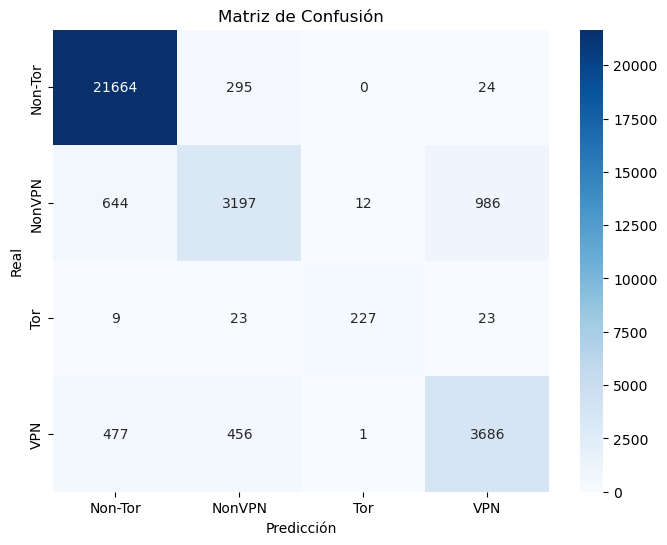

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear un mapa de calor de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


/home/lia/.local/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


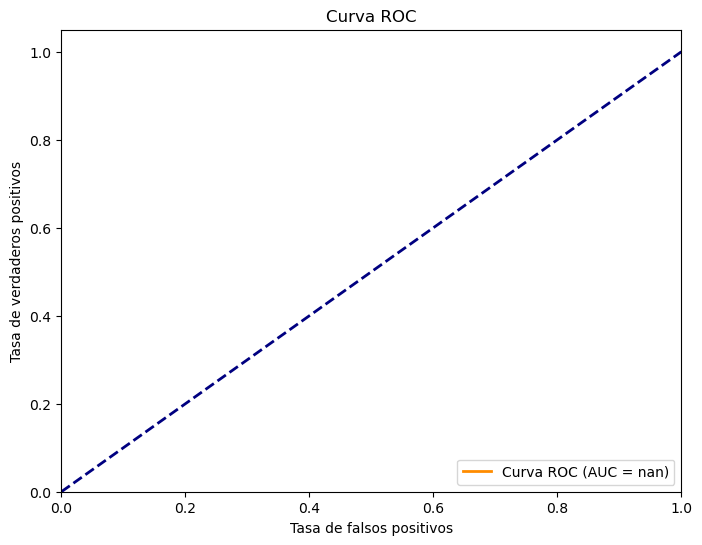

In [12]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Binarizar las etiquetas para multiclase
y_test_bin = label_binarize(y_test, classes=label_encoder.classes_)
y_pred_bin = label_binarize(y_pred, classes=label_encoder.classes_)

# Calcular la curva ROC y el AUC para cada clase
fpr, tpr, _ = roc_curve(y_test_bin[:, 0], y_pred_bin[:, 0])
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


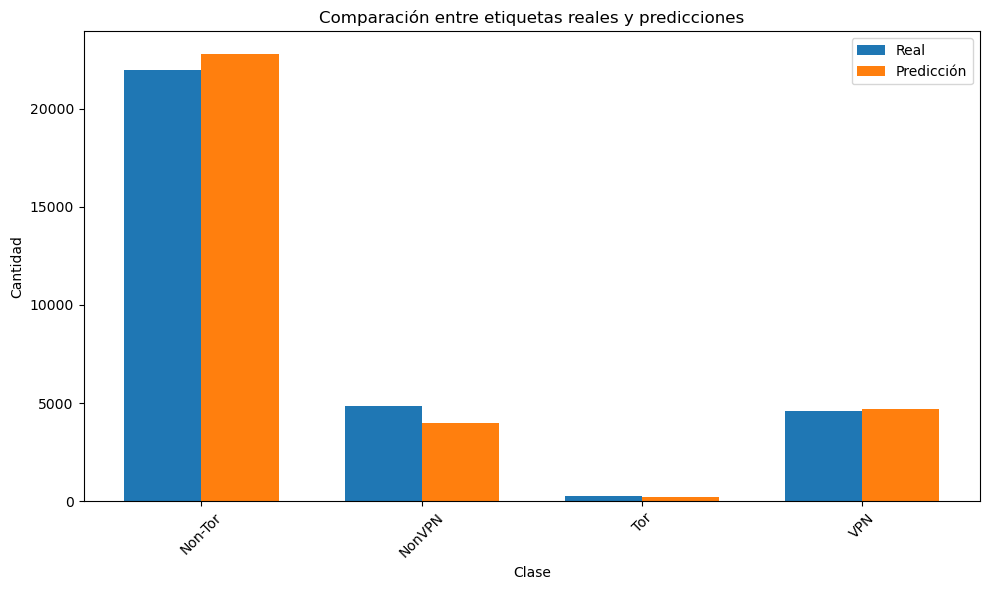

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Comparar predicciones y etiquetas reales
labels = label_encoder.classes_
real_counts = np.bincount(y_test)
pred_counts = np.bincount(y_pred)

# Crear un gráfico de barras
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, real_counts, width, label='Real')
rects2 = ax.bar(x + width/2, pred_counts, width, label='Predicción')

ax.set_xlabel('Clase')
ax.set_ylabel('Cantidad')
ax.set_title('Comparación entre etiquetas reales y predicciones')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()
